<a href="https://colab.research.google.com/github/DoSiHoai/DoSiHoai_20146491_AI_2023/blob/main/Noicomdienthongminh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=04b1ba4b3d1b45f019e1fd7b096d8855356fd55d49aa803d6380391d7508add3
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:

import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0, 5, 10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30, 80, 0.1)
slow = fuzz.trimf(x,[30, 30, 50])
medium = fuzz.trimf(x, [30, 50, 70])
medium_fast = fuzz.trimf(x,[50, 60, 80])
full_speed = fuzz.trimf(x, [60, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

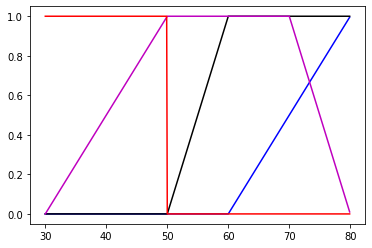

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30, 80, 0.1)
slow = fuzz.trapmf(x,[30, 30, 50, 50])
medium = fuzz.trapmf(x, [30, 50, 70, 80])
medium_fast = fuzz.trapmf(x,[50, 60, 80, 80])
full_speed = fuzz.trapmf(x, [60, 80, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

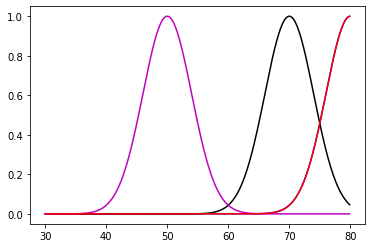

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30, 80, 0.1)
slow = fuzz.gaussmf(x, 80, 4)
medium = fuzz.gaussmf(x, 50, 4)
medium_fast = fuzz.gaussmf(x, 70, 4)
full_speed = fuzz.gaussmf(x, 80, 4)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

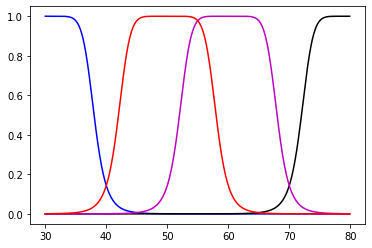

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30, 80, 0.1)
slow = fuzz.gbellmf(x, 8, 4, 50)
medium = fuzz.gbellmf(x, 8, 4, 60)
medium_fast = fuzz.gbellmf(x, 8, 4, 80)
full_speed = fuzz.gbellmf(x, 8, 4, 0)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food = ctrl.Antecedent(np.arange(0, 11, 1),'Food')
service = ctrl.Antecedent(np.arange(0, 11, 1),'Service')
tip = ctrl.Consequent(np.arange(10, 31, 1),'Tip')
food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
                                          
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])

tip['less'] = fuzz.trimf(tip.universe, [10,10,20])
tip['normal'] = fuzz.trimf(tip.universe, [10,20,30])
tip['much'] = fuzz.trimf(tip.universe, [20,30,30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule4 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule7 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule8 = ctrl.Rule(food['good'] & service['good'], tip['much'])
rule9 = ctrl.Rule(food['average'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 6.5
tipping.input['Service'] = 9
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)

36.15942028985507


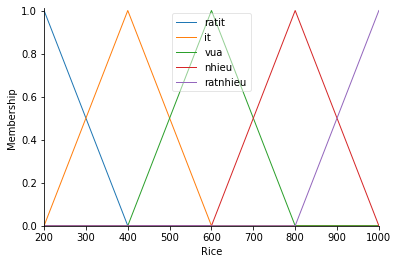

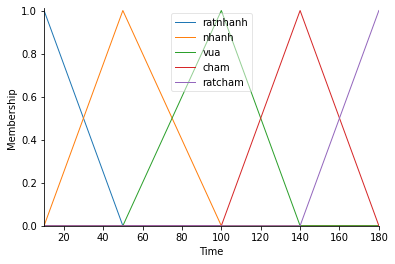

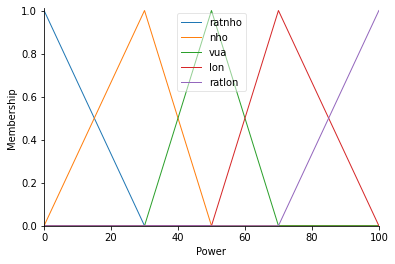

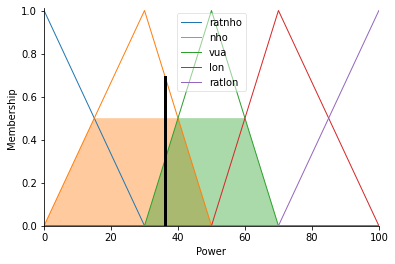

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
rice = ctrl.Antecedent(np.arange(200, 1001, 20),'Rice')
time = ctrl.Antecedent(np.arange(10, 181, 10),'Time')
power = ctrl.Consequent(np.arange(0, 101, 10),'Power')

rice['ratit'] = fuzz.trimf(rice.universe, [200,200,400])
rice['it'] = fuzz.trimf(rice.universe, [200,400,600])
rice['vua'] = fuzz.trimf(rice.universe, [400,600,800])
rice['nhieu'] = fuzz.trimf(rice.universe, [600,800,1000])    
rice['ratnhieu'] = fuzz.trimf(rice.universe, [800,1000,1000])    

time['ratnhanh'] = fuzz.trimf(time.universe, [10, 10, 50])
time['nhanh'] = fuzz.trimf(time.universe, [10,50,100])
time['vua'] = fuzz.trimf(time.universe, [50,100,140])
time['cham'] = fuzz.trimf(time.universe, [100,140,180])
time['ratcham'] = fuzz.trimf(time.universe, [140,180,180])

power['ratnho'] = fuzz.trimf(power.universe, [0,0,30])
power['nho'] = fuzz.trimf(power.universe, [0,30,50])
power['vua'] = fuzz.trimf(power.universe, [30,50,70])
power['lon'] = fuzz.trimf(power.universe, [50,70,100])
power['ratlon'] = fuzz.trimf(power.universe, [70,100,100])

rice.view()
time.view()
power.view()

rule1 = ctrl.Rule(rice['ratit'] & time['ratnhanh'], power['vua'])
rule2 = ctrl.Rule(rice['ratit'] & time['nhanh'], power['vua'])
rule3 = ctrl.Rule(rice['ratit'] & time['vua'], power['nho'])
rule4 = ctrl.Rule(rice['ratit'] & time['cham'], power['ratnho'])   
rule5 = ctrl.Rule(rice['ratit'] & time['ratcham'], power['nho'])       

rule6 = ctrl.Rule(rice['it'] & time['ratnhanh'], power['vua'])                                                                                                                                                                                                                                          
rule7 = ctrl.Rule(rice['it'] & time['nhanh'], power['vua']) 
rule8 = ctrl.Rule(rice['it'] & time['vua'], power['nho']) 
rule9 = ctrl.Rule(rice['it'] & time['cham'], power['nho']) 
rule10 = ctrl.Rule(rice['it'] & time['ratcham'], power['nho']) 

rule11 = ctrl.Rule(rice['vua'] & time['ratnhanh'], power['lon']) 
rule12 = ctrl.Rule(rice['vua'] & time['nhanh'], power['lon']) 
rule13 = ctrl.Rule(rice['vua'] & time['vua'], power['vua'])
rule14 = ctrl.Rule(rice['vua'] & time['cham'], power['nho']) 
rule15 = ctrl.Rule(rice['vua'] & time['ratcham'], power['nho'])

rule16 = ctrl.Rule(rice['nhieu'] & time['ratnhanh'], power['lon'])
rule17 = ctrl.Rule(rice['nhieu'] & time['nhanh'], power['lon'])
rule18 = ctrl.Rule(rice['nhieu'] & time['vua'], power['lon'])
rule19 = ctrl.Rule(rice['nhieu'] & time['cham'], power['nho'])
rule20 = ctrl.Rule(rice['nhieu'] & time['ratcham'], power['ratnho'])

rule21 = ctrl.Rule(rice['ratnhieu'] & time['ratnhanh'], power['ratlon'])
rule22 = ctrl.Rule(rice['ratnhieu'] & time['nhanh'], power['ratlon'])
rule23 = ctrl.Rule(rice['ratnhieu'] & time['vua'], power['lon'])
rule24 = ctrl.Rule(rice['ratnhieu'] & time['cham'], power['ratnho'])
rule25 = ctrl.Rule(rice['ratnhieu'] & time['ratcham'], power['ratnho'])

powerP_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powerP = ctrl.ControlSystemSimulation(powerP_ctrl)
powerP.input['Time'] = 120
powerP.input['Rice'] = 500
powerP.compute()
print(powerP.output['Power'])
power.view(sim = powerP)